In [40]:
# Basic Tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.colors as mcolors
#import seaborn as sns
from scipy.stats import randint, uniform, norm, expon, lognorm
from scipy.spatial import distance_matrix
import scipy.integrate as integrate

from astropy.table import Table#, vstack, hstack, join
#import astropy.units as u
import h5py

#import corner
import os

# Notes

- Most stars in clusters have up to 25 element abundances measured, but in some cases there are clusters that have less, down to 21 measured element abundances. So in X[j] I would like, if useful, to have NaNs in the elements that dont have the respective measurement, and then for the statistics just ommit the NaN values.

- There are clusters with 1 star (may consider doing histogram of number of stars)

# Network

## Data

In [2]:
abusolar_cluster_giants = Table.read('data/abusolar_cluster_giants.csv')
abusolar_star_giants_individual_stars = Table.read('data/abusolar_star_giants_individual_stars.csv')

In [3]:
abusolar_cluster_giants.columns

<TableColumns names=('Nstars','cluster','MeanSNR','Na 1','errNa 1','NNa 1','Al 1','errAl 1','NAl 1','Mg 1','errMg 1','NMg 1','Si 1','errSi 1','NSi 1','Ca 1','errCa 1','NCa 1','Sc 2','errSc 2','NSc 2','Ti 1','errTi 1','NTi 1','Ti 2','errTi 2','NTi 2','V 1','errV 1','NV 1','Cr 1','errCr 1','NCr 1','Mn 1','errMn 1','NMn 1','Fe 1','errFe 1','NFe 1','Fe 2','errFe 2','NFe 2','Co 1','errCo 1','NCo 1','Ni 1','errNi 1','NNi 1','Cu 1','errCu 1','NCu 1','Zn 1','errZn 1','NZn 1','Y 2','errY 2','NY 2','Zr 1','errZr 1','NZr 1','Zr 2','errZr 2','NZr 2','Mo 1','errMo 1','NMo 1','Ba 2','errBa 2','NBa 2','Ce 2','errCe 2','NCe 2','Pr 2','errPr 2','NPr 2','Nd 2','errNd 2','NNd 2','oc','ageNN','err_ageNN','age','err_age','dist','X','Y','Z','Rgc','Na1Fe1','errNa1Fe1','Al1Fe1','errAl1Fe1','Mg1Fe1','errMg1Fe1','Si1Fe1','errSi1Fe1','Ca1Fe1','errCa1Fe1','Sc2Fe1','errSc2Fe1','Ti1Fe1','errTi1Fe1','Ti2Fe1','errTi2Fe1','V1Fe1','errV1Fe1','Cr1Fe1','errCr1Fe1','Mn1Fe1','errMn1Fe1','Co1Fe1','errCo1Fe1','Ni1Fe1','errNi

In [4]:
abusolar_cluster_giants = pd.read_csv('data/abusolar_cluster_giants.csv')
abusolar_star_giants_individual_stars = pd.read_csv('data/abusolar_star_giants_individual_stars.csv')

In [5]:
# This because I want to make a function to setup the variables before MCMC, using the Tables as input
cluster_df = abusolar_cluster_giants
clusters_stars_df = abusolar_star_giants_individual_stars

In [6]:
print(cluster_df.columns)
cluster_cols = ['Nstars','cluster','MeanSNR','ageNN','err_ageNN','age','err_age','dist','X','Y','Z','ageNN_old','age_old']
cluster_df[cluster_cols]

Index(['Nstars', 'cluster', 'MeanSNR', 'Na 1', 'errNa 1', 'NNa 1', 'Al 1',
       'errAl 1', 'NAl 1', 'Mg 1',
       ...
       'Ba2Fe1', 'errBa2Fe1', 'Ce2Fe1', 'errCe2Fe1', 'Pr2Fe1', 'errPr2Fe1',
       'Nd2Fe1', 'errNd2Fe1', 'ageNN_old', 'age_old'],
      dtype='object', length=136)


,Nstars,cluster,MeanSNR,ageNN,err_ageNN,age,err_age,dist,X,Y,Z,ageNN_old,age_old
0,4.0,UBC_3,116.696970,8.301030,0.062,0.200000,0.020635,1644.0,1172.0,1145.0,136.0,8.301030,0.200000
1,1.0,NGC_6475,302.000000,8.350000,0.062,0.223872,0.031960,283.0,282.0,-20.0,-22.0,8.350000,0.223872
2,12.0,NGC_6705,68.963087,8.480000,0.062,0.301995,0.043113,2164.0,1921.0,991.0,-104.0,8.480000,0.301995
3,5.0,NGC_3532,176.800000,8.600000,0.048,0.398107,0.044000,498.0,166.0,-469.0,12.0,8.600000,0.398107
4,1.0,Stock_1,211.000000,8.640000,0.048,0.436516,0.048246,410.0,203.0,356.0,14.0,8.640000,0.436516
5,5.0,UBC_215,71.800000,8.650000,0.048,0.446684,0.049369,1372.0,-1099.0,-814.0,-107.0,8.650000,0.446684
6,10.0,NGC_2099,69.350000,8.650000,0.048,0.446684,0.049369,1384.0,-1380.0,56.0,74.0,8.650000,0.446684
7,2.0,NGC_6281,135.000000,8.710000,0.048,0.512861,0.056684,532.0,520.0,-112.0,18.0,8.710000,0.512861
8,3.0,NGC_6645,74.333333,8.710000,0.048,0.512861,0.056684,1750.0,1680.0,474.0,-110.0,8.710000,0.512861
9,2.0,FSR_0850,67.191489,8.710000,0.048,0.512861,0.056684,2126.0,-2121.0,-130.0,-85.0,8.710000,0.512861


In [7]:
print(clusters_stars_df.columns)
star_cols = ['Unnamed: 0','cluster','star','element','synth_MH','synth_MH_err',
             'synth_x_over_h','synth_x_over_h_err','synth_absolute_abund','synth_absolute_abund_err']
clusters_stars_df[star_cols]

Index(['Unnamed: 0', 'cluster', 'star', 'element', 'synth_teff',
       'synth_teff_err', 'synth_logg', 'synth_logg_err', 'synth_MH',
       'synth_MH_err', 'synth_vmic', 'synth_vmic_err', 'synth_vmac',
       'synth_vmac_err', 'synth_vsini', 'synth_vsini_err', 'synth_R',
       'synth_R_err', 'vel_atomic', 'vel_atomic_err', 'synth_x_over_h',
       'synth_x_over_h_err', 'synth_absolute_abund',
       'synth_absolute_abund_err', 'synth_nlines', 'snr'],
      dtype='object')


,Unnamed: 0,cluster,star,element,synth_MH,synth_MH_err,synth_x_over_h,synth_x_over_h_err,synth_absolute_abund,synth_absolute_abund_err
0,25,FSR_0278,G2180302768725634688,Al 1,-0.11,0.03,0.059541,0.0142,6.5259,0.0127
1,26,FSR_0278,G2180302768725634688,Ba 2,-0.11,0.03,0.076139,0.0163,2.1975,0.0064
2,27,FSR_0278,G2180302768725634688,Ca 1,-0.11,0.03,0.029721,0.0327,6.3626,0.0866
3,28,FSR_0278,G2180302768725634688,Co 1,-0.11,0.03,0.023984,0.0397,4.9239,0.1103
4,29,FSR_0278,G2180302768725634688,Cr 1,-0.11,0.03,-0.010506,0.0941,5.6099,0.0788
...,...,...,...,...,...,...,...,...,...,...
5193,6235,UBC_6,G1989397554090593920,V 1,-0.18,0.03,-0.115689,0.0181,3.7584,0.0641
5194,6236,UBC_6,G1989397554090593920,Y 2,-0.18,0.03,0.048903,0.0050,2.2095,0.0411
5195,6237,UBC_6,G1989397554090593920,Zn 1,-0.18,0.03,-0.057484,0.1162,4.2618,0.1144
5196,6238,UBC_6,G1989397554090593920,Zr 1,-0.18,0.03,-0.156725,0.2482,2.5163,0.2468


(array([ 125.,  249.,  449., 1620., 1471.,  672.,  446.,  100.,    0.,
          66.]),
 array([-0.38 , -0.327, -0.274, -0.221, -0.168, -0.115, -0.062, -0.009,
         0.044,  0.097,  0.15 ]),
 <BarContainer object of 10 artists>)

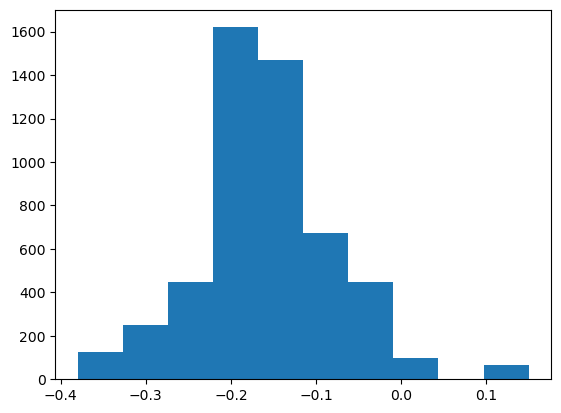

In [8]:
plt.hist(clusters_stars_df['synth_MH'])

## Setting T and X

In [20]:
clusters = np.array(cluster_df['cluster']) # Cluster names
K = len(clusters) # Number of clusters

# Setting T
T_m, T_sd = np.array(cluster_df['age']), np.array(cluster_df['err_age'])

# We reorder the arrays based on cluster Age T_m from oldest to youngest
cluster_sort_idx = np.argsort(T_m)[::-1]
clusters = clusters[cluster_sort_idx]
T_m, T_sd = T_m[cluster_sort_idx], T_sd[cluster_sort_idx]

# Setting X
# Approach in case I want to keep all the elements and set as NaN for the stars with missing ones.
X = [] # List with matrices X[k] k=1,...,K of shape N_cluster_stars x N_elements
elements = np.unique(clusters_stars_df['element']) # All the available element abundances (in order)
element_idx = lambda element: np.where(elements == element)[0][0] # Mapping for element to idx in ordered array
for k, cluster in enumerate(clusters):
    cluster_mask = clusters_stars_df['cluster'] == cluster
    cluster_individual_stars = clusters_stars_df[cluster_mask]
    cluster_stars = np.unique(cluster_individual_stars['star'])
    star_elements = np.unique(cluster_individual_stars['element'])
    X_k = np.full((len(cluster_stars), len(elements)), np.nan) # Empty matrix
    for i, star in enumerate(cluster_stars):
        star_mask = cluster_individual_stars['star'] == star
        individual_star = cluster_individual_stars[star_mask]
        elements_idx = list(individual_star['element'].apply(element_idx)) # Map the available elements to their respective ordered index
        X_k[i,elements_idx] = individual_star['synth_x_over_h'] # Is this column for the abundance in X?
    X.append(X_k)

In [24]:
len(X)

47

In [25]:
# Add in case I want to exclude stars with missing values in any of the elements
# obs: by doing this I lose 3 clusters, since all of its stars have a missing element. And also I leave a cluster with 1 star
exclude_mask = np.ones(len(elements), dtype='bool')
exclude_idx = []
for k in range(K):
    exclude_idx_k = []
    for i in range(len(X[k])):
        idx_to_exclude = np.argwhere(np.isnan(X[k][i]))
        if len(idx_to_exclude) > 0:
            #print(k,i)
            exclude_idx_k.append(i)
        else:
            continue # To only have either empty lists or lists with the indexes to exclude
            #exclude_idx_k.append(None) # To see the clusters after the potential removal
    exclude_idx.append(exclude_idx_k)

X_ = []
exclude_cluster = []
cluster_mask = np.ones(len(clusters), dtype='bool')
for k, cluster in enumerate(clusters):
    if len(X[k]) > len(exclude_idx[k]): # If The stars I remove don't delete the whole cluster
        exclude_mask = np.ones(len(X[k]), dtype='bool')
        exclude_mask[exclude_idx[k]] = 0
        X[k] = X[k][exclude_mask,:]
        X_.append(X[k])
    else: # I lose all the stars in the cluster, I remove it.
        print('Removed cluster {}: {}'.format(k,cluster))
        exclude_cluster.append(k)

# Change arrays after removing the clusters
# No need to reorder since they were already ordered by age
X = X_
cluster_mask[exclude_cluster] = 0
clusters = clusters[cluster_mask]
K = len(clusters)
T_m, T_sd = T_m[cluster_mask], T_sd[cluster_mask]

Removed cluster 0: NGC_6791
Removed cluster 22: UBC_44
Removed cluster 37: FSR_0850


TO ADD: 

- If necessary, Change the dfs removing rows involving the removed clusters and rearange with the respective arrays

In [10]:
'''
Add in case I want to exclude elements missing in at least one of the stars, for all the clusters
# obs: by doing this I lose 7 elements (on the original 47 clusters)
exclude_mask = np.ones(len(elements), dtype='bool')
exclude_idx = []
for k in range(K):
    for i in range(len(X[k])):
        idx_to_exclude = np.argwhere(np.isnan(X[k][i]))
        if len(idx_to_exclude) > 0:
            idx_to_exclude = idx_to_exclude[0][0]
            exclude_idx.append(idx_to_exclude)
exclude_idx = np.unique(exclude_idx)
exclude_mask[exclude_idx] = 0
for k in range(K):
    X[k] = X[k][:,exclude_mask]
''';

## Setting prior for T, G, A

- Decide wether set the priors as functions or arrays

In [11]:
# If priors are set as functions (Improve if finally needed)
def Pr_T(loc, scale, size, **kwargs):
    return norm.rvs(loc, scale, size, **kwargs)

def Pr_G(s,loc,scale):
    return lognorm(s=s,loc=loc,scale=scale)

def Pr_A(loc,scale,size,**kwargs):
    return expon.rvs(loc,scale,size,**kwargs)

print('Pr_T')
print(Pr_T(loc=T_m, scale=T_sd,size=K))

print('Pr_G')
G_m, G_sd = 0, 1 # Don't know the actual values yet
s = 1 # Shape parameter for distribution, don't know actual useful value for this yet
N = K # Bins of equal probability, don't know if is K or a value sufficiently high
G_bins = randint.rvs(low=1, high=N+1, loc=0, size=K)
print(G_bins)
print(Pr_G(s,G_m,G_sd).ppf(q=(G_bins-0.5)/N))

print('Pr_A')
cluster_R = np.array(cluster_df['Rgc']).reshape(-1,1)[cluster_sort_idx] # Is Rgc the radius in pc? If not, where to find cluster radius
A_m = distance_matrix(cluster_R, cluster_R, p=1)
A_m = np.where(A_m!=0, 1/A_m,0) # Find a better way to compute it and avoid warning
print(A_m)
print(Pr_A(loc=0,scale=A_m, size=(K,K)))    

Pr_T
[7.97247686 6.9053093  4.28279138 3.0155431  3.11231515 2.81571012
 2.77469523 2.35302665 2.26362762 2.00773201 1.98282588 1.72476949
 1.63690492 1.4816804  1.4974231  1.45442931 1.37601752 1.35317759
 1.20236684 1.12603802 1.12094927 1.00594904 0.98688029 1.02547099
 0.94874699 0.77325587 0.80450162 0.71453009 0.5521067  0.7393659
 0.6197559  0.66931968 0.59046307 0.59817921 0.58131898 0.56124904
 0.50781322 0.46185552 0.46537924 0.57479157 0.42873537 0.49985356
 0.45489229 0.41439144 0.28497208 0.22674244 0.19048982]
Pr_G
[14 16 20 20 19 24 23 26 32  3 37 38 15 12  1 44  6 14 32 46 13 16 35  5
  4 13  6 44 44 45 10 46 37  3 33  6  3  6 20 25 24  5 31 13 30 17 15]
[0.5703624  0.643714   0.80656204 0.80656204 0.76345272 1.
 0.94804072 1.11278747 1.55348493 0.19895705 2.13987298 2.30261526
 0.60648432 0.50091222 0.09995453 4.23464426 0.30421829 0.5703624
 1.55348493 6.38126853 0.53521562 0.643714   1.86840584 0.27085115
 0.23614735 0.53521562 0.30421829 4.23464426 4.23464426 5.0262

/tmp/ipykernel_305865/3462460321.py:25: RuntimeWarning: divide by zero encountered in divide
  A_m = np.where(A_m!=0, 1/A_m,0) # Find a better way to compute it and avoid warning


In [12]:
# If priors are set as arrays
print('Pr_T')
Pr_T = norm.rvs(loc=T_m, scale=T_sd, size=K)
print(Pr_T)

print('Pr_G')
G_m, G_sd = 0, 1 # Don't know the actual values yet
s = 1 # Shape parameter for distribution, don't know actual useful value for this yet
N = K # Bins of equal probability, don't know if N=K or a value sufficiently high
G_bins = randint.rvs(low=1, high=N+1, loc=0, size=K)
Pr_G = lognorm.ppf(q=(G_bins-0.5)/N, s=s, loc=G_m, scale=G_sd)
print(G_bins)
print(Pr_G)

print('Pr_A')
cluster_R = np.array(cluster_df['Rgc']).reshape(-1,1)[cluster_sort_idx] # Is Rgc the radius in pc? If not, where to find cluster radius
A_m = distance_matrix(cluster_R, cluster_R, p=1)
A_m = np.where(A_m!=0, 1/A_m,0) # Find a better way to compute it and avoid warning
print(A_m)
Pr_A = expon.rvs(loc=0, scale=A_m, size=(K,K))
print(Pr_A)

Pr_T
[7.93325238 7.27934146 4.0368107  3.0251464  3.11060536 2.86654685
 2.86608693 2.33635227 2.28595897 2.03719303 1.94652502 1.7072426
 1.61043664 1.5101677  1.50675544 1.47181788 1.3472493  1.32585172
 1.18797795 1.13139406 1.13425288 1.00749295 1.1681374  0.83502164
 0.86913757 0.77618938 0.83725358 0.7741216  0.64501102 0.7920198
 0.70596119 0.64630583 0.60932067 0.64149031 0.50301416 0.6091294
 0.41317457 0.4909711  0.53936824 0.44205552 0.3591544  0.48294624
 0.37506092 0.40014903 0.26893328 0.29580073 0.2180439 ]
Pr_G
[ 1 34 20  6 16 16 12 14 15 38 13 40 28 46 44 27 21 10 38  5 45 22 10  5
 28 18 17 31 33  4 46 40 44  4 14 23 26 10  9 40 27 35 10 38  6  7 38]
[0.09995453 1.75327127 0.80656204 0.30421829 0.643714   0.643714
 0.50091222 0.5703624  0.60648432 2.30261526 0.53521562 2.7079945
 1.23983023 6.38126853 4.23464426 1.17431661 0.8515591  0.43428879
 2.30261526 0.27085115 5.02621041 0.89864419 0.43428879 0.27085115
 1.23983023 0.72204992 0.68218805 1.46587148 1.64884725 0.

/tmp/ipykernel_305865/329096160.py:18: RuntimeWarning: divide by zero encountered in divide
  A_m = np.where(A_m!=0, 1/A_m,0) # Find a better way to compute it and avoid warning


## Initialization

In [13]:
'''# If the priors were set as functions
T = T_m # Pr_T(loc=T_m, scale=T_sd,size=K)

G_m, G_sd = 0, 1 # Don't know the actual values yet
s = 1 # Shape parameter for distribution, don't know actual useful value for this yet
N = K # Bins of equal probability, don't know if is K or a value sufficiently high
G_bins = randint.rvs(low=1, high=N+1, loc=0, size=K)
G = Pr_G(s,G_m,G_sd).ppf(q=(G_bins-0.5)/N)

# TO ADD: Initialization for A''';

In [14]:
# If the priors were set as arrays
T = Pr_T
G = Pr_G

# TO ADD: Initialization for A
A = np.zeros((K+1,K))
'''(...)
Y = calY(T,G,X) 
Y_m, Y_sd = calY()
'''
A

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

For the initialization of A:

- How to set Y[0] as the species abundance in pristine gas (75% H, 25% He)
- How to recover Y_m and Y_sd for all the clusters using calY (which I might need to implement)
- Look into the equation X[i]=Y_m[i]*b to obtain the off diagonal terms in A, check dimensions and implement solution of equations

In [15]:
# logLik and logPr
def logLik(T,G,X,Y_m,Y_sd,A):
    return

def logPr(T,T_m,T_sd,A,A_m):
    return

# calY

## Data

In [16]:
LT_hf = h5py.File('data/wiersma09a/Lifetimes.hdf5','r')
AGB_hf = h5py.File('data/wiersma09a/AGB.hdf5','r')
SNIa_hf = h5py.File('data/wiersma09a/SNIa.hdf5','r')
SNII_hf = h5py.File('data/wiersma09a/SNII.hdf5','r')
print(LT_hf.keys())
print(AGB_hf.keys())
print(SNIa_hf.keys())
print(SNII_hf.keys())

<KeysViewHDF5 ['Lifetimes', 'Masses', 'Metallicities', 'Number_of_masses', 'Number_of_metallicities', 'Reference']>
<KeysViewHDF5 ['Masses', 'Metallicities', 'Number_of_masses', 'Number_of_metallicities', 'Number_of_species', 'Reference', 'Species_names', 'Yield_names', 'Yields']>
<KeysViewHDF5 ['Number_of_species', 'Reference', 'Species_names', 'Total_Metals', 'Yield']>
<KeysViewHDF5 ['Masses', 'Metallicities', 'Number_of_masses', 'Number_of_metallicities', 'Number_of_species', 'Reference', 'Species_names', 'Yield_names', 'Yields']>


For the lifetimes, we have the lifetimes for 30 different star masses based on 6 different metallicities

In [17]:
for i, key in enumerate(LT_hf.keys()): 
    print(i, key, np.array(LT_hf.get(key)))

0 Lifetimes [[4.2787197e+10 2.3677901e+10 1.4100400e+10 8.9718999e+09 6.0331003e+09
  4.2264000e+09 3.0808000e+09 2.3419000e+09 1.9157000e+09 1.6620000e+09
  1.3875000e+09 1.1811000e+09 1.1070100e+09 9.6588998e+08 8.3315002e+08
  4.6390000e+08 3.0263002e+08 1.6059000e+08 1.0140800e+08 7.1466000e+07
  5.3313000e+07 3.4242000e+07 2.1335000e+07 1.5363900e+07 1.0616900e+07
  6.9018000e+06 5.4524000e+06 4.1990000e+06 3.3189000e+06 3.1057000e+06]
 [5.3491290e+10 2.9514441e+10 1.7336130e+10 1.0887900e+10 7.1307904e+09
  4.9271900e+09 3.5227000e+09 2.6421000e+09 2.3900001e+09 1.9486300e+09
  1.6329600e+09 1.2753751e+09 1.2513500e+09 1.2263700e+09 1.0809900e+09
  5.9751002e+08 3.6696602e+08 1.8233200e+08 1.1111500e+08 7.6229704e+07
  5.6095900e+07 3.5069200e+07 2.1395700e+07 1.5230030e+07 1.0457460e+07
  6.8518100e+06 5.4356400e+06 4.1948900e+06 3.3800000e+06 3.2262000e+06]
 [6.4672629e+10 3.5444802e+10 2.0871979e+10 1.2976151e+10 8.4630098e+09
  5.7160699e+09 4.1173801e+09 2.9227802e+09 2.3559

For the AGB yields, we have the yields for 11 elements/species over 23 different masses, for 3 different metallicities.

In [18]:
for i, key in enumerate(AGB_hf.keys()): 
    print(i, key, np.array(AGB_hf.get(key)))

0 Masses [0.85  0.918 0.992 1.071 1.154 1.239 1.315 1.407 1.499 1.583 1.667 1.75
 1.832 1.85  1.9   2.    2.2   2.5   3.    3.5   4.    4.5   5.   ]
1 Metallicities [0.004 0.008 0.019]
2 Number_of_masses 23
3 Number_of_metallicities 3
4 Number_of_species 11
5 Reference b'Margio 2001 (A&A, 370, 194)'
6 Species_names [b'Hydrogen' b'Helium' b'Carbon' b'Nitrogen' b'Oxygen' b'Neon'
 b'Magnesium' b'Silicon' b'Sulphur' b'Calcium' b'Iron']
7 Yield_names [b'Z_0.004' b'Z_0.008' b'Z_0.019']
8 Yields ['Z_0.004' 'Z_0.008' 'Z_0.019']


In the yields key we find for the 3 different metalicities: the ejected mass for the 23 different masses, the total (yield in?) metals for the 23 different masses, and the 11 different element yields for the 23 different masses 

In [19]:
print('Masses', np.array(AGB_hf.get('Masses')))
print('Ejected mass',np.array(AGB_hf.get('Yields/Z_0.004/Ejected_mass')))
print('Total metals',np.array(AGB_hf.get('Yields/Z_0.004/Total_Metals')))
print('Yields')
for species, yields in zip(np.array(AGB_hf.get('Species_names')),np.array(AGB_hf.get('Yields/Z_0.004/Yield'))):
    print(species,yields)

Masses [0.85  0.918 0.992 1.071 1.154 1.239 1.315 1.407 1.499 1.583 1.667 1.75
 1.832 1.85  1.9   2.    2.2   2.5   3.    3.5   4.    4.5   5.   ]
Ejected mass [0.2572482  0.3161683  0.38490278 0.45222607 0.5212739  0.6055978
 0.6869174  0.7658069  0.85059017 0.9183698  0.9848546  1.0494518
 1.15638    1.1297171  1.171      1.25       1.42       1.69
 2.034      2.505      3.001      3.481      3.96      ]
Total metals [8.5509032e-07 1.5061934e-06 2.4725455e-06 4.3512987e-06 1.0996721e-03
 7.6160068e-03 1.9530190e-02 2.7428562e-02 3.4084883e-02 4.2022217e-02
 5.0641067e-02 5.8828089e-02 6.8164013e-02 6.6702411e-02 6.9452852e-02
 7.7087782e-02 8.5716598e-02 8.7622039e-02 8.4893323e-02 5.9022687e-02
 4.9489114e-02 4.0284589e-02 5.0231170e-02]
Yields
b'Hydrogen' [-0.00399238 -0.0050486  -0.00628523 -0.00757716 -0.01220578 -0.03320706
 -0.07155964 -0.0969162  -0.11909954 -0.14597717 -0.17350571 -0.20007502
 -0.23174804 -0.22711758 -0.23744436 -0.26256147 -0.2964651  -0.31075284
 -0.3064931

- Why are there negative yields for Carbon and Oxygen, for example?

- Which metallicity to use? The one given by the star?

For the SNIa yields, we know that the yields are independent of the initial mass and metallicity of the progenitor system and the total mass ejected in a SNIa is assumed to be $1.23M_\odot$, even though the total mass in metals is $1.3740855$ (the Chandrasekhar limit in $M_{\odot}$?). For SNIa we have that the yields are all the same.

In [20]:
for i, key in enumerate(SNIa_hf.keys()): 
    print(i, key, np.array(SNIa_hf.get(key)))

0 Number_of_species 42
1 Reference b'Thielemann et al. 2003 (From Twilight to Highlight: The Physics of SN proceedings, ESO/MPA/MPE Workshop, pg 331) - as tabulated in Travaglio et al. 2004 (A&A, 425, 1029)'
2 Species_names [b'Hydrogen' b'Helium' b'Lithium' b'Beryllium' b'Boron' b'Carbon'
 b'Nitrogen' b'Oxygen' b'Fluorine' b'Neon' b'Sodium' b'Magnesium'
 b'Aluminum' b'Silicon' b'Phosphorus' b'Sulphur' b'Chlorine' b'Argon'
 b'Potassium' b'Calcium' b'Scandium' b'Titanium' b'Vanadium' b'Chromium'
 b'Manganese' b'Iron' b'Cobalt' b'Nickel' b'Copper' b'Zinc' b'Gallium'
 b'Germanium' b'Arsenic' b'Selenium' b'Bromine' b'Krypton' b'Rubidium'
 b'Strontium' b'Yttrium' b'Zirconium' b'Niobium' b'Molybdenum']
3 Total_Metals [1.3740855]
4 Yield [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 5.04011e-02
 4.95250e-07 1.40000e-01 5.72000e-10 4.24851e-03 6.20000e-05 1.31802e-02
 8.17000e-04 1.54227e-01 3.15000e-04 8.66313e-02 1.62100e-04 1.57370e-02
 7.41300e-05 1.21345e-02 2.17000e-07 2.36

For the SNII yields, in a similar manner to AGB, we have the yields for 11 elements/species over 11 different masses, for 5 different metallicities.

In [21]:
for i, key in enumerate(SNII_hf.keys()): 
    print(i, key, np.array(SNII_hf.get(key)))

0 Masses [  6.   7.   9.  12.  15.  20.  30.  40.  60. 100. 120.]
1 Metallicities [0.0004 0.004  0.008  0.02   0.05  ]
2 Number_of_masses 11
3 Number_of_metallicities 5
4 Number_of_species 11
5 Reference b'Portinari et al. 1998 (A&A, 334, 505)'
6 Species_names [b'Hydrogen' b'Helium' b'Carbon' b'Nitrogen' b'Oxygen' b'Neon'
 b'Magnesium' b'Silicon' b'Sulphur' b'Calcium' b'Iron']
7 Yield_names [b'Z_0.0004' b'Z_0.004' b'Z_0.008' b'Z_0.02' b'Z_0.05']
8 Yields ['Z_0.0004' 'Z_0.004' 'Z_0.008' 'Z_0.02' 'Z_0.05']


In [22]:
print('Masses', np.array(SNII_hf.get('Masses')))
print('Ejected mass',np.array(SNII_hf.get('Yields/Z_0.004/Ejected_mass')))
print('Total metals',np.array(SNII_hf.get('Yields/Z_0.004/Total_Metals')))
print('Yields')
for species, yields in zip(np.array(SNII_hf.get('Species_names')),np.array(SNII_hf.get('Yields/Z_0.004/Yield'))):
    print(species,yields)

Masses [  6.   7.   9.  12.  15.  20.  30.  40.  60. 100. 120.]
Ejected mass [ 4.7       5.7       7.654897 10.500625 13.184878 17.95977  23.023737
 27.37314  40.020008 63.23434  84.7216  ]
Total metals [-1.4910754e-03 -1.8486278e-03  4.7919941e-01  1.3140452e+00
  2.1355956e+00  4.0921373e+00  3.9515610e+00  3.3835199e+00
  5.0112605e+00  8.1387024e+00  2.1365313e-01]
Yields
b'Hydrogen' [ -0.39455894  -0.69714135  -1.3487093   -2.3384452   -3.2532556
  -5.1652074   -6.0061607   -6.27406    -10.198419   -19.621792
 -31.979473  ]
b'Helium' [ 0.39605   0.69899   0.86951   1.0244    1.11766   1.07307   2.0546
  2.89054   5.187158 11.48309  31.76582 ]
b'Carbon' [-0.00184186 -0.00241365  0.08273343  0.160637    0.226899    0.253049
  0.295797    0.334057    0.3965794   0.312612    0.04309672]
b'Nitrogen' [0.00354847 0.00500089 0.00669904 0.00894477 0.01194901 0.01420705
 0.02556369 0.03378443 0.05547043 0.10843    0.202469  ]
b'Oxygen' [-1.761978e-03 -2.694687e-03  1.454280e-01  6.845270e-0

In [32]:
# Take Ti 2, 
element_yields = ['H','He','Li','Be','B','C','N','O','F','Ne',
                  'Na','Mg','Al','Si','P','S','Cl','Ar',
                  'K','Ca','Sc','Ti','V','Cr','Mn','Fe','Co','Ni',
                  'Cu','Zn','G','Gr','Ar','Se','Br','Kr','Rb','St','Y','Zr','Nb','Mb']
print(elements)
#print(element_yields)

['Al 1' 'Ba 2' 'Ca 1' 'Ce 2' 'Co 1' 'Cr 1' 'Cu 1' 'Fe 1' 'Fe 2' 'Mg 1'
 'Mn 1' 'Mo 1' 'Na 1' 'Nd 2' 'Ni 1' 'Pr 2' 'Sc 2' 'Si 1' 'Ti 1' 'Ti 2'
 'V 1' 'Y 2' 'Zn 1' 'Zr 1' 'Zr 2']


- How to take into consideration the ionization states and cross-match with the yields tables?

In [23]:
print('Lifetimes', np.array(LT_hf.get('Masses')))
print('AGB', np.array(AGB_hf.get('Masses')))
print('SNIa', np.array(SNIa_hf.get('Total_Metals')))
print('SNII', np.array(SNII_hf.get('Masses')))

Lifetimes [  0.6   0.7   0.8   0.9   1.    1.1   1.2   1.3   1.4   1.5   1.6   1.7
   1.8   1.9   2.    2.5   3.    4.    5.    6.    7.    9.   12.   15.
  20.   30.   40.   60.  100.  120. ]
AGB [0.85  0.918 0.992 1.071 1.154 1.239 1.315 1.407 1.499 1.583 1.667 1.75
 1.832 1.85  1.9   2.    2.2   2.5   3.    3.5   4.    4.5   5.   ]
SNIa [1.3740855]
SNII [  6.   7.   9.  12.  15.  20.  30.  40.  60. 100. 120.]


## Function

In [60]:
# Initial Mass Function IMF
def chabrier_IMF(M,M_c=0.079,s=0.69,A_phi=0.842984,B_phi=0.235480):
    assert (M>=0.1) & (M<=120), 'Mass should be in range [0,1,120]'
    return A_phi * M**(-1) * np.exp(-(np.log(M)-np.log(M_c))**2/(2*s**2)) if M <= 1 else B_phi * M**(-2.3)

chabrier_IMG_vfunc = np.vectorize(chabrier_IMF) # Vectorized function to apply to arrays

In [74]:
np.sum(chabrier_IMG_vfunc(Ms))

8.139408946729116

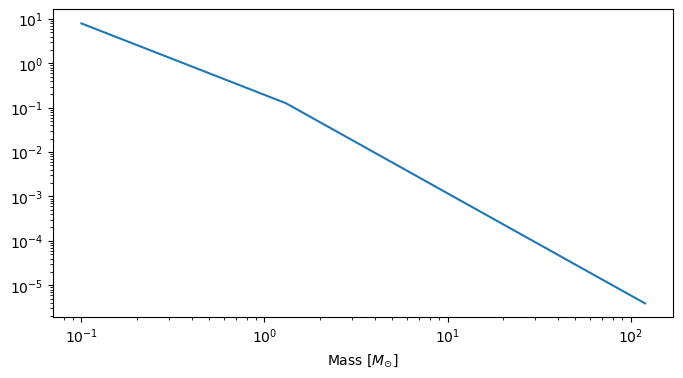

In [73]:
Ms = np.linspace(0.1,120,100)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
ax.plot(Ms,chabrier_IMG_vfunc(Ms))
ax.set_xlabel(r'Mass [$M_{\odot}$]')
#ax.set_ylabel(r'Mass fraction')
ax.set_xscale('log')
ax.set_yscale('log')

In [118]:
# Don't understand why is computed like this and not like the paper, takes into account the DTDs produced by gas cooling?
# Its alrady integrated, just evaluate 
def PL_DTD(dt,tau, a=0.15242):
    return a* (-1/0.12) * ((tau+dt)^(-0.12) - tau^(-0.12))

In [ ]:
IMF_dict = {'chabrier': chabrier_IMF}
DTD_dict = {'power law': PL_DTD}

In [147]:
AGB_y_004 = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/AGB_004.csv") #interpolated to include bin 6-7
AGB_y_02 = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/AGB_02.csv") #interpolated to include bin 6-7
SNII_y_004 = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/SNII_004.csv")
SNII_y_02 = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/SNII_02.csv")
SNIa_y = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/SNIa.csv")
Yields_dict = {'AGB_004': AGB_y_004,
          'AGB_02': AGB_y_004,
          'SNII_004': SNII_y_004,
          'SNII_02': SNII_y_02,
          'SNIa': SNIa_y}

In [402]:
def calY(t,T,G,X,
         A=0.028,P316=0.0385,
         IMF='chabrier', DTD='power law',
         IMF_dict = IMF_dict, DTD_dict = DTD_dict, Yields_dict = Yields_dict):
    '''
    Returns:
    
    Y_m: Median of normal distribution
    Y_sd: Standard deviation of normal distribution
    '''
    
    ## Process the different massses and yields here inside the function.
    
    # Masses
    AGB_m = np.array([0.85,0.918,0.992,1.071,1.154,1.239,1.315,1.407,1.499,1.583,1.667,1.75,1.832,1.85,1.9,2,2.2,2.5,3,3.5,4,4.5,5])
    # SNIa_m = np.array([1.4]) Chandrasekhar limit, should I use this later? 
    SNII_m = np.array([6,7,9,12,15,20,30,40,60,100,120])
    m = np.hstack(AGB_m, SNII_m) # Array of all mass bins (except SNIa)
    
    ## Treat the lifetimes here?
    LT = pd.read_csv("/home/kwalsen/Documents/ERIS/networks_/data/wiersma09a/lifetime.csv") 
    a0, a1, a2 = np.polyfit(x=np.log10(np.tile(LT['mass'],6)),
                            y=np.log10(np.transpose(np.array(LT)[:,1:]).flatten()),
                            deg=2)[::-1]
    fit = lambda x: a0 + a1*x + a2 * x**2
    AGB_t = fit(np.log10(AGB_m))
    SNII_t = fit(np.log10(SNII_m))
    
    # Number of stars per mass bin
    p_m = np.array([integrate.quad(func=IMF_dict[IMF], a=m[i], b=m[i+1])[0] for i in range(len(m)-1)]) # Cumulative of IMF for the mass bin m
    
    # We drop the last value since in the counts we sum over all the bin, indexing with the lower bound
    m = m[:-1]
    SNII_t = SNII_t[:-1] # Since we drop m=120
    
    # Counts per mass bin in cluster of gas mass G
    n_m = G*(p_m/m) # Expected total number of stars of mass bin m
    #n_m = norm.rvs(loc=G*(p/m[:-1]), scale=G*(p/m[:-1])) # May contain negative values since the high scale
    
    # Mask for slices in n_m
    AGB_mask = (m>=0.85)&(m<=5)
    SNII_mask = (m>=6)&(m<16)
    SNII16_mask = (m>=16)
    
    # Define A' for w_m
    P316 = np.sum(p[np.where((m>3)&(m<16))]) # Sum of pdf in-between bins (relies on grid m), != 0.0385 (Yates et Al. 2013) 
    A_prime = A*P316 # A' 
    
    # AGB_c?
    # SNIa_c?
    # SNII_c?
    
    # Define w_m for Y_m
    def w_m(t,T,tau,Xki):
        '''
        I want it to return a matrix of shape [len(m),J] where J is the number of species sampled for stars in cluster k  
        Input:
        t,T,tau,
        Xki=X[k][i] matrix of star i's abundances in cluster k,
        m = array of masses
        '''
        J = len(Xki)
        
        # Yields
        SNIa_y = Yields_dict['SNIa']
        if np.sum(Xki[2:])/np.sum(Xki) < 0.02:
            AGB_y = Yields_dict['AGB_004']
            SNII_y = Yields_dict['SNII_004'][:-1] # Since we drop m=120
        else:
            AGB_y = Yields_dict['AGB_02']
            SNII_y = Yields_dict['SNII_02'][:-1] # Since we drop m=120
        
        # Mask for the two different yields for SNII
        SNII_mask = (SNII_y['mass']>=6)&(SNII_y['mass']<16) 
        SNII16_mask = (SNII_y['mass']>=16)
        
        # Arrays with yields for J species
        AGB_w = np.zeros((len(AGB_y), J))
        SNIa_w = np.zeros(J)
        SNII_w = np.zeros((np.sum(SNII_mask),J))
        SNII16_w = np.zeros((np.sum(SNII16_mask),J))
        for j in range(J): # For each species, j -> element need a mapping maybe
            AGB_w[:,j] = ((Xki[j] * AGB_y['total_ejected'] + AGB_y[j]) * ((AGB_t >= (tau-(T-t))) * (AGB_t < (tau+(T-t))))) # 0.85 < m <= 7 
            SNIa_w[j] = A_prime * (Xki[j] * SNIa_y['total_metals'] + SNIa_y[j]) * integrate.quad(DTD_dict[DTD], a=tau, b=T-t)[0] # 0.85 < m <= 8
            SNII_w[:,j] = ((1-A) * (Xki[j] * SNII_y['total_ejected'] + SNII_y[j]) * ((SNII_t >= (tau-(T-t))) * (SNII_t < (tau+(T-t)))))[SNII_mask] # 7 < m <= 16
            SNII16_w[:,j] = (Xki[j] * SNII_y['total_ejected'] + SNII_y[j] * ((SNII_t >= (tau-(T-t))) * (SNII_t < (tau+(T-t)))))[SNII16_mask] # 16 < m
        
        Wm = {'AGB': AGB_w, 'SNIa': SNIa_w, 'SNII': SNII_w, 'SNII16': SNII16_w} ##
            
        return Wm ##
    
    # Define omega_m for Y_sd
    def omega_m(Wm):
        '''
        Returns
        
        Mx(JxJ) matrix
        '''
        M, J = np.shape(Wm)
        out = np.zeros(M,(J,J)) # for each mass I have a matrix of JxJ to then sum over all m matrices        
        for m in range(M):
            for j1 in range(J):
                out[m,j1,j1] = Wm[m,j1]**2
                for j2 in range(j1+1,J):
                    out[m,j1,j2] = Wm[m,j1]**2 + Wm[m,j2]**2
        
        # To reflect the upper diagonal values to lower diagonal
        out = out + np.transpose(out) - np.diag(np.diag(out)) # To reflect the upper diagonal values to lower diagonal
        
        return out
    
    
    
    #####
    
    
    #Y_m = # Mean of Y
    #Y_sd = # Standard deviation of Y
    
    return Y_m, Y_sd

- keep an eye to SNIa, when I sum over masses I consider all the counts between 0.85 and 8, and multiply it for the vector of yields in SNIa. Why?

- The slices for AGB and SNII are constructed in such a way that they agree with the mass array for each yield process.

In [364]:
print(len(m),m)
print(len(m[(m>=0.85)& (m<=5)]), m[(m>=0.85)& (m<=5)])
print(len(AGB_m), AGB_m)

33 [  0.85    0.918   0.992   1.071   1.154   1.239   1.315   1.407   1.499
   1.583   1.667   1.75    1.832   1.85    1.9     2.      2.2     2.5
   3.      3.5     4.      4.5     5.      6.      7.      9.     12.
  15.     20.     30.     40.     60.    100.   ]
23 [0.85  0.918 0.992 1.071 1.154 1.239 1.315 1.407 1.499 1.583 1.667 1.75
 1.832 1.85  1.9   2.    2.2   2.5   3.    3.5   4.    4.5   5.   ]
23 [0.85  0.918 0.992 1.071 1.154 1.239 1.315 1.407 1.499 1.583 1.667 1.75
 1.832 1.85  1.9   2.    2.2   2.5   3.    3.5   4.    4.5   5.   ]


In [365]:
print(len(m), m)
print(len(m[(m>=6)&(m<16)]),m[(m>=6)&(m<16)])
print(len(m[(m>=16)]),m[(m>=16)])
print(len(SNII_m), SNII_m)

33 [  0.85    0.918   0.992   1.071   1.154   1.239   1.315   1.407   1.499
   1.583   1.667   1.75    1.832   1.85    1.9     2.      2.2     2.5
   3.      3.5     4.      4.5     5.      6.      7.      9.     12.
  15.     20.     30.     40.     60.    100.   ]
5 [ 6.  7.  9. 12. 15.]
5 [ 20.  30.  40.  60. 100.]
11 [  6   7   9  12  15  20  30  40  60 100 120]


# Questions

- Will we have problems with this dataset if the lifetimes of the different yield processes don't overlap with the age differences among clusters? This could implies lots of False values when computing calY, then lots of 0 values in matrix A for MCMC, which is expectable but maybe not so useful if so many of them are zero

- tau = 35 MYr = 35e-3 GYr is negligible in comparison of some of the age differences among clusters

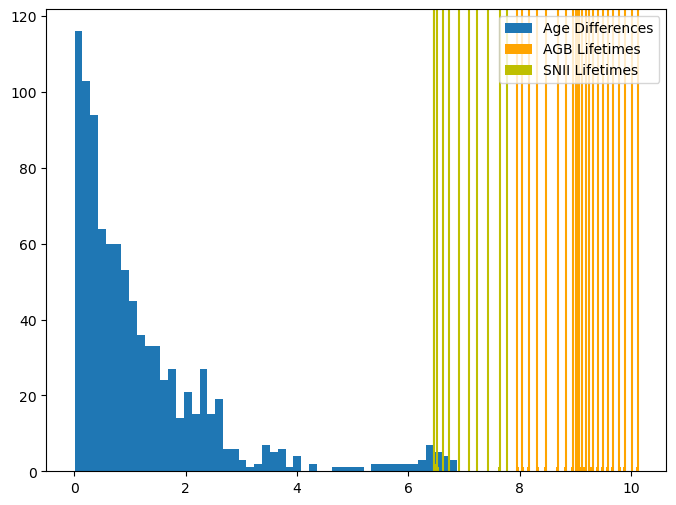

In [291]:
age_diffs = distance_matrix(x=T_m.reshape(-1,1),y=T_m.reshape(-1,1),p=1)
age_diffs = np.triu(age_diffs).flatten()
age_diffs = age_diffs[np.where(age_diffs>0)]
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(age_diffs, bins=np.linspace(np.min(age_diffs), np.max(age_diffs),50), label='Age Differences')
for line in AGB_t:
    ax.axvline(x=line, c='orange')
for line in SNII_t:
    ax.axvline(x=line, c='y')
ax.hist(AGB_t, bins=np.linspace(np.min(AGB_t), np.max(AGB_t),50), color='orange', label='AGB Lifetimes')
ax.hist(SNII_t, bins=np.linspace(np.min(SNII_t), np.max(SNII_t),50), color='y', label='SNII Lifetimes')
ax.legend(loc='upper right')
plt.show()

In [289]:
min(AGB_t), max(AGB_t)

(7.943259152503956, 10.122768548114992)

In [290]:
AGB_t

array([10.12276855, 10.00798218,  9.89420123,  9.78356447,  9.67753357,
        9.57817291,  9.49614302,  9.40429088,  9.31953824,  9.24757209,
        9.18017504,  9.11758848,  9.05927226,  9.0469047 ,  9.01332154,
        8.94934512,  8.83262346,  8.68047281,  8.47219248,  8.30409551,
        8.16440947,  8.0457641 ,  7.94325915])